In [6]:
# from nltk import FreqDist
# from nltk.tag import pos_tag
# from nltk.tokenize import word_tokenize
# import nltk
# from nltk.corpus import wordnet
# from nltk import FreqDist
# from nltk.tokenize import TweetTokenizer
# from nltk.tag import pos_tag
# import re, string
# from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
import time
import random
import numpy as np
import json
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import scipy.io
import math
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random
import numpy as np
from scipy.stats import binom
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [7]:


def Probabilistic_Method2(unique_words): 
    h = 2.2*len(unique_words)/(math.log(len(unique_words)))
    return  math.ceil(h)
    
def Random_Resolving_Set(unique_words):
    h = Probabilistic_Method2(unique_words)
    dictionary = dict()
    unique_words_poppy = unique_words
    for i in range(1,len(unique_words_poppy)):
        dictionary[i] = unique_words_poppy.pop()
    r = []
    q = []
    #print(len(dictionary))
    for i in range(1, h):
        Rlen = binom.rvs(len(dictionary), .5)
        for x in range(0,Rlen):
            k = random.randint(1, len(dictionary))
            r.append(dictionary.get(k))
        q.append(r)
        r = []
    return(q)


def Random_Resolving_Set_Compliment(unique_words):
    h = Probabilistic_Method2(unique_words)
    #print(h)
   # dictionary = dict.fromkeys( (range(1,len(unique_words))), unique_words)
    #print(dictionary)
    dictionary = dict()
    #print(len(unique_words))
    unique_words_poppy = unique_words
    for i in range(1,len(unique_words_poppy)):
        #dictionary = dict.fromkeys(unique_words.pop(), i)
        dictionary[i] = unique_words_poppy.pop()
    r = []
    q = []
    #print(len(dictionary))
    for i in range(1, h):
        Rlen = binom.rvs(len(dictionary), .5)
        for x in range(0,Rlen):
            k = random.randint(1, len(dictionary))
            r.append(dictionary.get(k))
        q.append(r)
        q.append(list(set(dictionary.values())-set(r)))
        r = []
    return(q)


def JaccardSim(a,b):
    U = a.union(b)
    I = a.intersection(b)
    similarity = (len(I)/len(U))
    return similarity


def JacVector(resolving, test):
    M = []
    for i in range(len(resolving)):
             M.append(JaccardSim(set(resolving[i]),set(test)))
    return(M)

def JVecEMatrix(resolving,tweets):
    veclist = []
    for tweet in tweets:
        veclist.append(JacVector(resolving,tweet))
    #q = scipy.spatial.distance.pdist(veclist, metric='euclidean')
    return veclist

def PCA_Plotting(data, new_dim):
    #planning to add color vector. 
    pca = PCA(n_components=new_dim)
    X_r = pca.fit(data).transform(data)
    colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    X_r=np.transpose(X_r)
    plt.scatter(X_r[0],X_r[1])
    print(pca.explained_variance_ratio_)
    print(pca.n_features_)
    print(pca.n_samples_)
    print(pca.n_components_)

def PCA_Ploting_Dict(data, new_dim, num_tones):
    #planning to allow for 3d. currently works only for 2 tones, 2dim. 
    vec_data = []
    tone_data = []
    for i in range(0,len(data)):
        vec_data.append(data.get(i).get('vec'))
        tone_data.append(data.get(i).get('tone'))
    pca = PCA(n_components=new_dim,)
    X_r = pca.fit(vec_data).transform(vec_data)
    lw = 2
    X_r=np.transpose(X_r)
    plt.figure()
    df = pd.DataFrame(dict(first=X_r[0],second = X_r[1],tone = tone_data))
    print(df)
    colors = {'negative': 'red', 'positive':'blue'}
    plt.scatter(df['first'], df['second'],s=3, c=df['tone'].map(colors))
    print(pca.explained_variance_ratio_)
    print(pca.n_features_)
    print(pca.n_samples_)
    print(pca.n_components_)



In [3]:
def PCA_Ploting_Dict_Tones_axis_tester(data, new_dim, num_tones, axis):
    #planning to allow for 3d. currently works only for , 2dim. 
    #this version takes in which axis you want to plot. requires a new_dim length vector
    print(axis[1])
    vec_data = []
    tone_data = []
    for i in range(0,len(data)):
        vec_data.append(data.get(i).get('vec'))
        tone_data.append(data.get(i).get('tone'))
    
    
    pca = PCA(n_components=axis[new_dim - 1],) #define a PCA object with chosen dimension number
    X_r = pca.fit(vec_data).transform(vec_data) #transform the data to fit it to the pca object
    
    
    #colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    X_r=np.transpose(X_r) #for plotting
    #plt.scatter(X_r[0],X_r[1])
    print(X_r)
    if(new_dim == 2):
        plt.figure()
        plt.xlabel(str(axis[0]))
        plt.ylabel(str(axis[1]))
        colors = ["navy", "turquoise"]
        lw = 2
        df = pd.DataFrame(dict(first=X_r[axis[0]-1],second = X_r[axis[1]-1],tone = tone_data))
        print(df)
        colors = {'negative': 'red', 'positive':'blue', 'neutral': 'brown', 'forth_tone': 'yellow'}
        plt.scatter(df['first'], df['second'], c=df['tone'].map(colors))
        
        print(pca.explained_variance_ratio_)
        print(pca.n_features_)
        print(pca.n_samples_)
        print(pca.n_components_)
    
    elif(new_dim==3):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.set_xlabel(str(axis[0]))
        ax.set_ylabel(str(axis[1]))
        ax.set_zlabel(str(axis[2]))#labels the axis choice
        colors = ["navy", "turquoise"]
        lw = 13
        df = pd.DataFrame(dict(first=X_r[axis[0]-1],second = X_r[axis[1]-1], third = X_r[axis[2]-1], tone = tone_data))
        print(df)
        colors = {'negative': 'red', 'positive':'blue', 'neutral': 'brown', 'forth_tone': 'yellow'}
        ax.scatter(df['first'], df['second'], df['third'], c=df['tone'].map(colors))

        print(pca.explained_variance_ratio_)
        print(pca.n_features_)
        print(pca.n_samples_)
        print(pca.n_components_)
def k_means_pca_optimizer(data, max_components, num_dimensions, num_clusters, num_tones, tones_list, plotting):
    vec_data = []
    tone_data = []
    score_holder = -2
    score_dummy = -2
    #pca_matrix holder 
    
    if(num_clusters != 0):
        
        for i in range(0,len(data)):
            vec_data.append(data.get(i).get('vec'))
            tone_data.append(data.get(i).get('tone'))


        pca = PCA(n_components=max_components,)
        X_r = pca.fit(vec_data).transform(vec_data)
        
        
        if (num_dimensions==2):
            # need to iterate through to find best PCA axis
            for iterator1 in range(1,max_components):
                for iterator2 in range(1,max_components) :
                    if(iterator1 != iterator2):
                        pca_matrix_dummy = []
                        pca_matrix_dummy = np.column_stack((X_r[:,iterator1],X_r[:,iterator2]))
                        kmeans = KMeans(n_clusters=num_clusters)
                        X_cluster = kmeans.fit_predict(pca_matrix_dummy) # this one predicts the clustering
                        score_dummy = silhouette_score(pca_matrix_dummy,kmeans.labels_)
                        if(score_dummy > score_holder):
                            score_holder = score_dummy
                            pca_matrix_holder = pca_matrix_dummy
                            X_cluster_holder = X_cluster
                            axis = [str(iterator1) +","+str(iterator2)]
                            axis_for_plot = [str(iterator1),str(iterator2)]
                            centers = np.array(kmeans.cluster_centers_)
            
            if (plotting == True):
                #need to figure out how to make this work for arbitrary tones. 
                plt.figure()
                lw = 2
                pca_matrix_holder=np.transpose(pca_matrix_holder)
                df = pd.DataFrame(dict(first = pca_matrix_holder[0],second = pca_matrix_holder[1],tone = tone_data))
                #print(df)
                colors_list = ['red','blue','brown','purple','orange','teal','maroon','fuchsia','grey','tan']
                colors = {}
                dummy_color = 0
                for tone_iterator in tones_list :
                    colors[tone_iterator] = colors_list[dummy_color]
                    dummy_color = dummy_color+1
                plt.scatter(df['first'], df['second'], c=df['tone'].map(colors))
                #centers = np.transpose(centers)
                plt.scatter(centers[:,0], centers[:,1], marker = "x" , color = "black")
                plt.xlabel(axis_for_plot[0])
                plt.ylabel(axis_for_plot[1])
                plt.title("PCA on Tweet Data With")
                #plt.legend()
                plt.show

        elif(num_dimensions == 3):
            for iterator1 in range(1,max_components-1):
                for iterator2 in range(1,max_components-1):
                    for iterator3 in range(1,max_components-1):
                        if(iterator1 != iterator2 and iterator1 != iterator3 and iterator2 != iterator3):
                            pca_matrix_dummy = []
                            kmeans = KMeans(n_clusters=num_clusters)
                            pca_matrix_dummy = np.column_stack((X_r[:,iterator1],X_r[:,iterator2],X_r[:,iterator3]))
                            X_cluster = kmeans.fit_predict(pca_matrix_dummy) # this one predicts the clustering
                            score_dummy = silhouette_score(X_r,kmeans.labels_)

                            if(score_dummy > score_holder):
                                score_holder = score_dummy
                                pca_matrix_holder = pca_matrix_dummy
                                X_cluster_holder = X_cluster
                                axis = [str(iterator1)+ ","+str(iterator2) + "," +str(iterator3)]
                                centers = np.array(kmeans.cluster_centers_)
                                
            if (plotting == True):
                x = list(set(tone_data))
                dic = dict(zip(x, list(range(-1,len(x)-1)))) #this should work with arbitrary tones. 
                tone_data_numeric =[dic[v] for v in tone_data]
                tone_data_numeric = np.asarray(h)
                tone_data_numeric = tone_data_numeric.transpose()
                matlab_matrix = np.column_stack((pca_matrix_holder,tone_data_numeric))
                mdic = {"Data": matlab_matrix, "label": "experiment"}
                filename = r"C:\Users\ajpar\OneDrive\Desktop\Research Documents\ResearchPython\Matlab"  +'\\' + str(max_components) + str(num_dimensions) + str(num_clusters) + str(num_tones) + "function.mat"
                scipy.io.savemat(filename,mdic)
                
                
                
                print("This functionality needs to be improved. Label centers by hand")
                
                #change the positive, negative, neutral to numbers. Then send to matlab using code from evan. 
                #this should simply replace positive negative and neutrals, then open matlab
        else:
            print("This functionality needs to be added")
    
    else:
        print("Currently,call outside loop to find optimal clusters using returning frame")
    returning_frame = pd.DataFrame(dict(score = score_holder, Axis =  axis, Clusters = len(centers)))
    return(returning_frame)

In [8]:
#addition of tri tone cross contamination (no noise)

start_time = time.time()
n = 850 # number of words in each dictionary (n for each tone)
lam = 30 # average sentence length
crossC3_fraction = .1 #the expected portion of the words in each sentnece that are from the opposite tone.
imported_vader_words = []
negative_vader_list = []
neutral_vader_list = []
positive_vader_list = []
acc_vec_crossC3 = []
acc_vec_crossC3_prime =[]

#reading in the words. Change the filepath to suit where yours is stored
x = open("Files/Full_Vader_Senti.txt", "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
for line in x:
    
    l = line.strip('\n')
    l = l.split("\t")
    imported_vader_words.append(l)
    
x.close()

for y in imported_vader_words : #sorting the words by tone
    if (-1<= float(y[1]) <= 1):
        neutral_vader_list.append(y[0]) 
    elif (float(y[1]) < -1):
        negative_vader_list.append(y[0])
    else :
        positive_vader_list.append(y[0])




for crossC3_fraction in np.linspace(0,.3,6):
    shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
    shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
    shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates
    
    
    negative_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam - 2*lam*crossC3_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3_fraction, size=None)
        negative_sent_list.append(random.sample(shorten_neg, h) +random.sample(shorten_pos, k) + random.sample(shorten_neutral,j))

    positive_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3_fraction, size=None)
        positive_sent_list.append(random.sample(shorten_pos, h)+random.sample(shorten_neg, k) + random.sample(shorten_neutral,j))

    neutral_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3_fraction, size=None)
        neutral_sent_list.append(random.sample(shorten_neutral,h)+random.sample(shorten_pos, k)+random.sample(shorten_neg, j))
    
    
    
    
    final_list = negative_sent_list + positive_sent_list + neutral_sent_list

    #getting wordlist 
    wordlist_crossC3 = {x for l in final_list for x in l}
    wordlist_crossC3_prime = {x for l in final_list for x in l}

    #generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
    resolving_crossC3 = Random_Resolving_Set((shorten_pos+shorten_neg+shorten_neutral).copy())
    resolving_crossC3_prime = Random_Resolving_Set(shorten_pos) + Random_Resolving_Set(shorten_neg) + Random_Resolving_Set(shorten_neutral)# + #Random_Resolving_Set(shorten_neutral)
    print(len(resolving_crossC3))

    #generating the Jaccard Matrices
    JacMatrix_crossC3 = JVecEMatrix(resolving_crossC3,final_list)
    JacMatrix_crossC3_prime = JVecEMatrix(resolving_crossC3_prime,final_list)

    labeled_dic_crossC3 = {}
    labeled_dic_crossC3_prime = {}

    #this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
    for i in range(0,len(JacMatrix_crossC3)):
        if (i<500):
            labeled_dic_crossC3[i] = {'vec': JacMatrix_crossC3[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3[i] = {'vec': JacMatrix_crossC3[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3[i] = {'vec': JacMatrix_crossC3[i], 'tone': "neutral"} #for now this never triggers, but could for tri tone cross contam


    for i in range(0,len(JacMatrix_crossC3_prime)):
        if (i<500):
            labeled_dic_crossC3_prime[i] = {'vec': JacMatrix_crossC3_prime[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3_prime[i] = {'vec': JacMatrix_crossC3_prime[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3_prime[i] = {'vec': JacMatrix_crossC3_prime[i], 'tone': "neutral"}#for now this never triggers, but could for tri tone cross contam
    
    
    
    df2crossC3 = pd.DataFrame.from_dict(labeled_dic_crossC3,orient='index')
    tones_crossC3 = pd.DataFrame(df2crossC3.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3 = pd.DataFrame(df2crossC3.vec.tolist())
    t_crossC3 = pd.Categorical(tones_crossC3['tone'])
    tones_crossC3['tone'] = t_crossC3.codes
    
    df2crossC3_prime = pd.DataFrame.from_dict(labeled_dic_crossC3_prime,orient='index')
    tones_crossC3_prime = pd.DataFrame(df2crossC3_prime.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3_prime = pd.DataFrame(df2crossC3_prime.vec.tolist())
    t_crossC3_prime = pd.Categorical(tones_crossC3_prime['tone'])
    tones_crossC3_prime['tone'] = t_crossC3_prime.codes
    
    X_jacc_words_crossC3 = jaccard_df_crossC3.to_numpy()
    Y_label_crossC3 = tones_crossC3.to_numpy()
    X_train_crossC3, X_test_crossC3, y_train_crossC3, y_test_crossC3 = train_test_split(X_jacc_words_crossC3, Y_label_crossC3, test_size=0.3, random_state=430)
    model_clf_crossC3 = svm.SVC(kernel='linear').fit(X_train_crossC3, np.ravel(y_train_crossC3))
    predicted_crossC3 = model_clf_crossC3.predict(X_test_crossC3)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3.append(accuracy_score(y_test_crossC3, predicted_crossC3))
    
    X_jacc_words_crossC3_prime = jaccard_df_crossC3_prime.to_numpy()
    Y_label_crossC3_prime = tones_crossC3_prime.to_numpy()
    X_train_crossC3_prime, X_test_crossC3_prime, y_train_crossC3_prime, y_test_crossC3_prime = train_test_split(X_jacc_words_crossC3_prime, Y_label_crossC3_prime, test_size=0.3, random_state=430)
    model_clf_crossC3_prime = svm.SVC(kernel='linear').fit(X_train_crossC3_prime, np.ravel(y_train_crossC3_prime))
    predicted_crossC3_prime = model_clf_crossC3_prime.predict(X_test_crossC3_prime)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3_prime.append(accuracy_score(y_test_crossC3_prime, predicted_crossC3_prime))
    print("--- %s seconds ---" % (time.time() - start_time))
print("--- %s seconds ---" % (time.time() - start_time))

715
--- 84.0110650062561 seconds ---
715
--- 166.97549200057983 seconds ---
715
--- 249.71104621887207 seconds ---
715
--- 333.8974702358246 seconds ---
715
--- 417.2943253517151 seconds ---
715
--- 500.8577630519867 seconds ---
--- 500.8580060005188 seconds ---


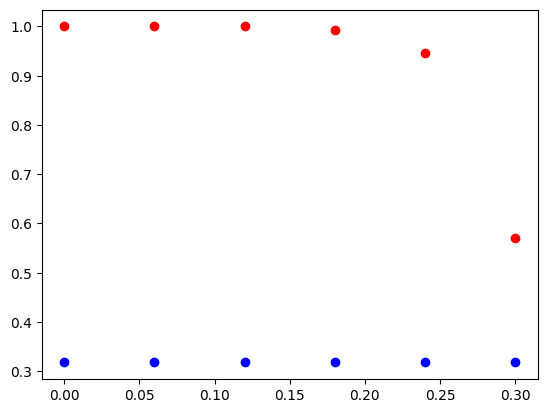

In [10]:
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3,c='blue')
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3_prime,c='red')

In [10]:
np.shape(JacMatrix_crossC3)
np.shape(JacMatrix_crossC3_prime)
len(JacMatrix_crossC3_prime)

1500

In [11]:
df2crossC3

,vec,tone
0,"[0.0136986301369863, 0.01608325449385052, 0.01...",negative
1,"[0.01085883514313919, 0.009505703422053232, 0....",negative
2,"[0.014792899408284023, 0.017159199237368923, 0...",negative
3,"[0.0137524557956778, 0.01807802093244529, 0.00...",negative
4,"[0.013793103448275862, 0.012333965844402278, 0...",negative
...,...,...
1495,"[0.007874015748031496, 0.005681818181818182, 0...",neutral
1496,"[0.005928853754940711, 0.007633587786259542, 0...",neutral
1497,"[0.01568627450980392, 0.014164305949008499, 0....",neutral
1498,"[0.008875739644970414, 0.009514747859181731, 0...",neutral


In [12]:
df2crossC3_prime

,vec,tone
0,"[0.017045454545454544, 0.015873015873015872, 0...",negative
1,"[0.011695906432748537, 0.010869565217391304, 0...",negative
2,"[0.011527377521613832, 0.013440860215053764, 0...",negative
3,"[0.008547008547008548, 0.005291005291005291, 0...",negative
4,"[0.0057306590257879654, 0.0026595744680851063,...",negative
...,...,...
1495,"[0.005813953488372093, 0.005405405405405406, 0...",neutral
1496,"[0.0029498525073746312, 0.0027397260273972603,...",neutral
1497,"[0.008450704225352112, 0.015873015873015872, 0...",neutral
1498,"[0.008771929824561403, 0.005420054200542005, 0...",neutral


In [13]:
#addition of tri tone cross contamination (no noise)

start_time = time.time()
n = 400 # number of words in each dictionary (n for each tone)
lam = 30 # average sentence length
crossC3400_fraction = .1 #the expected portion of the words in each sentnece that are from the opposite tone.
imported_vader_words = []
negative_vader_list = []
neutral_vader_list = []
positive_vader_list = []
acc_vec_crossC3400 = []
acc_vec_crossC3400_prime =[]

#reading in the words. Change the filepath to suit where yours is stored
x = open(r"C:\Users\ajpar\OneDrive\Desktop\Research Documents\Project Coding\Sample_Word_Datasets\Full_Vader_Senti.txt", "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
for line in x:
    
    l = line.strip('\n')
    l = l.split("\t")
    imported_vader_words.append(l)
    
x.close()

for y in imported_vader_words : #sorting the words by tone
    if (-1<= float(y[1]) <= 1):
        neutral_vader_list.append(y[0]) 
    elif (float(y[1]) < -1):
        negative_vader_list.append(y[0])
    else :
        positive_vader_list.append(y[0])




for crossC3400_fraction in np.linspace(0,.3,6):
    shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
    shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
    shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates
    
    
    negative_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam - 2*lam*crossC3400_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3400_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3400_fraction, size=None)
        negative_sent_list.append(random.sample(shorten_neg, h) +random.sample(shorten_pos, k) + random.sample(shorten_neutral,j))

    positive_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3400_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3400_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3400_fraction, size=None)
        positive_sent_list.append(random.sample(shorten_pos, h)+random.sample(shorten_neg, k) + random.sample(shorten_neutral,j))

    neutral_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3400_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3400_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3400_fraction, size=None)
        neutral_sent_list.append(random.sample(shorten_neutral,h)+random.sample(shorten_pos, k)+random.sample(shorten_neg, j))
    
    
    
    
    final_list = negative_sent_list + positive_sent_list + neutral_sent_list

    #getting wordlist 
    wordlist_crossC3400 = {x for l in final_list for x in l}
    wordlist_crossC3400_prime = {x for l in final_list for x in l}

    #generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
    resolving_crossC3400 = Random_Resolving_Set((shorten_pos+shorten_neg+shorten_neutral).copy())
    resolving_crossC3400_prime = Random_Resolving_Set(shorten_pos) + Random_Resolving_Set(shorten_neg) + Random_Resolving_Set(shorten_neutral)# + #Random_Resolving_Set(shorten_neutral)
    print(len(resolving_crossC3400))

    #generating the Jaccard Matrices
    JacMatrix_crossC3400 = JVecEMatrix(resolving_crossC3400,final_list)
    JacMatrix_crossC3400_prime = JVecEMatrix(resolving_crossC3400_prime,final_list)

    labeled_dic_crossC3400 = {}
    labeled_dic_crossC3400_prime = {}

    #this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
    for i in range(0,len(JacMatrix_crossC3400)):
        if (i<500):
            labeled_dic_crossC3400[i] = {'vec': JacMatrix_crossC3400[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3400[i] = {'vec': JacMatrix_crossC3400[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3400[i] = {'vec': JacMatrix_crossC3400[i], 'tone': "neutral"} #for now this never triggers, but could for tri tone cross contam


    for i in range(0,len(JacMatrix_crossC3400_prime)):
        if (i<500):
            labeled_dic_crossC3400_prime[i] = {'vec': JacMatrix_crossC3400_prime[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3400_prime[i] = {'vec': JacMatrix_crossC3400_prime[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3400_prime[i] = {'vec': JacMatrix_crossC3400_prime[i], 'tone': "neutral"}#for now this never triggers, but could for tri tone cross contam
    
    
    
    df2crossC3400 = pd.DataFrame.from_dict(labeled_dic_crossC3400,orient='index')
    tones_crossC3400 = pd.DataFrame(df2crossC3400.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3400 = pd.DataFrame(df2crossC3400.vec.tolist())
    t_crossC3400 = pd.Categorical(tones_crossC3400['tone'])
    tones_crossC3400['tone'] = t_crossC3400.codes
    
    df2crossC3400_prime = pd.DataFrame.from_dict(labeled_dic_crossC3400_prime,orient='index')
    tones_crossC3400_prime = pd.DataFrame(df2crossC3400_prime.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3400_prime = pd.DataFrame(df2crossC3400_prime.vec.tolist())
    t_crossC3400_prime = pd.Categorical(tones_crossC3400_prime['tone'])
    tones_crossC3400_prime['tone'] = t_crossC3400_prime.codes
    
    X_jacc_words_crossC3400 = jaccard_df_crossC3400.to_numpy()
    Y_label_crossC3400 = tones_crossC3400.to_numpy()
    X_train_crossC3400, X_test_crossC3400, y_train_crossC3400, y_test_crossC3400 = train_test_split(X_jacc_words_crossC3400, Y_label_crossC3400, test_size=0.3, random_state=430)
    model_clf_crossC3400 = svm.SVC(kernel='linear').fit(X_train_crossC3400, np.ravel(y_train_crossC3400))
    predicted_crossC3400 = model_clf_crossC3400.predict(X_test_crossC3400)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3400.append(accuracy_score(y_test_crossC3400, predicted_crossC3400))
    
    X_jacc_words_crossC3400_prime = jaccard_df_crossC3400_prime.to_numpy()
    Y_label_crossC3400_prime = tones_crossC3400_prime.to_numpy()
    X_train_crossC3400_prime, X_test_crossC3400_prime, y_train_crossC3400_prime, y_test_crossC3400_prime = train_test_split(X_jacc_words_crossC3400_prime, Y_label_crossC3400_prime, test_size=0.3, random_state=430)
    model_clf_crossC3400_prime = svm.SVC(kernel='linear').fit(X_train_crossC3400_prime, np.ravel(y_train_crossC3400_prime))
    predicted_crossC3400_prime = model_clf_crossC3400_prime.predict(X_test_crossC3400_prime)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3400_prime.append(accuracy_score(y_test_crossC3400_prime, predicted_crossC3400_prime))
    print("--- %s seconds ---" % (time.time() - start_time))
print("--- %s seconds ---" % (time.time() - start_time))

372
--- 30.207237720489502 seconds ---
372
--- 58.55778527259827 seconds ---
372
--- 88.28749084472656 seconds ---
372
--- 117.0192186832428 seconds ---
372
--- 144.37666249275208 seconds ---
372
--- 174.08913660049438 seconds ---
--- 174.08913660049438 seconds ---


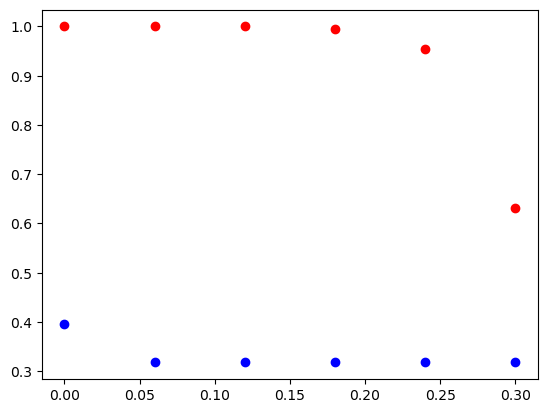

In [14]:
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3400,c='blue')
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3400_prime,c='red')

In [15]:
#addition of tri tone cross contamination (no noise)

start_time = time.time()
n = 350 # number of words in each dictionary (n for each tone)
lam = 30 # average sentence length
crossC3350_fraction = .1 #the expected portion of the words in each sentnece that are from the opposite tone.
imported_vader_words = []
negative_vader_list = []
neutral_vader_list = []
positive_vader_list = []
acc_vec_crossC3350 = []
acc_vec_crossC3350_prime =[]

#reading in the words. Change the filepath to suit where yours is stored
x = open(r"C:\Users\ajpar\OneDrive\Desktop\Research Documents\Project Coding\Sample_Word_Datasets\Full_Vader_Senti.txt", "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
for line in x:
    
    l = line.strip('\n')
    l = l.split("\t")
    imported_vader_words.append(l)
    
x.close()

for y in imported_vader_words : #sorting the words by tone
    if (-1<= float(y[1]) <= 1):
        neutral_vader_list.append(y[0]) 
    elif (float(y[1]) < -1):
        negative_vader_list.append(y[0])
    else :
        positive_vader_list.append(y[0])




for crossC3350_fraction in np.linspace(0,.3,6):
    shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
    shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
    shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates
    
    
    negative_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam - 2*lam*crossC3350_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3350_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3350_fraction, size=None)
        negative_sent_list.append(random.sample(shorten_neg, h) +random.sample(shorten_pos, k) + random.sample(shorten_neutral,j))

    positive_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3350_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3350_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3350_fraction, size=None)
        positive_sent_list.append(random.sample(shorten_pos, h)+random.sample(shorten_neg, k) + random.sample(shorten_neutral,j))

    neutral_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3350_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3350_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3350_fraction, size=None)
        neutral_sent_list.append(random.sample(shorten_neutral,h)+random.sample(shorten_pos, k)+random.sample(shorten_neg, j))
    
    
    
    
    final_list = negative_sent_list + positive_sent_list + neutral_sent_list

    #getting wordlist 
    wordlist_crossC3350 = {x for l in final_list for x in l}
    wordlist_crossC3350_prime = {x for l in final_list for x in l}

    #generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
    resolving_crossC3350 = Random_Resolving_Set((shorten_pos+shorten_neg+shorten_neutral).copy())
    resolving_crossC3350_prime = Random_Resolving_Set(shorten_pos) + Random_Resolving_Set(shorten_neg) + Random_Resolving_Set(shorten_neutral)# + #Random_Resolving_Set(shorten_neutral)
    print(len(resolving_crossC3350))

    #generating the Jaccard Matrices
    JacMatrix_crossC3350 = JVecEMatrix(resolving_crossC3350,final_list)
    JacMatrix_crossC3350_prime = JVecEMatrix(resolving_crossC3350_prime,final_list)

    labeled_dic_crossC3350 = {}
    labeled_dic_crossC3350_prime = {}

    #this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
    for i in range(0,len(JacMatrix_crossC3350)):
        if (i<500):
            labeled_dic_crossC3350[i] = {'vec': JacMatrix_crossC3350[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3350[i] = {'vec': JacMatrix_crossC3350[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3350[i] = {'vec': JacMatrix_crossC3350[i], 'tone': "neutral"} #for now this never triggers, but could for tri tone cross contam


    for i in range(0,len(JacMatrix_crossC3350_prime)):
        if (i<500):
            labeled_dic_crossC3350_prime[i] = {'vec': JacMatrix_crossC3350_prime[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3350_prime[i] = {'vec': JacMatrix_crossC3350_prime[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3350_prime[i] = {'vec': JacMatrix_crossC3350_prime[i], 'tone': "neutral"}#for now this never triggers, but could for tri tone cross contam
    
    
    
    df2crossC3350 = pd.DataFrame.from_dict(labeled_dic_crossC3350,orient='index')
    tones_crossC3350 = pd.DataFrame(df2crossC3350.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3350 = pd.DataFrame(df2crossC3350.vec.tolist())
    t_crossC3350 = pd.Categorical(tones_crossC3350['tone'])
    tones_crossC3350['tone'] = t_crossC3350.codes
    
    df2crossC3350_prime = pd.DataFrame.from_dict(labeled_dic_crossC3350_prime,orient='index')
    tones_crossC3350_prime = pd.DataFrame(df2crossC3350_prime.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3350_prime = pd.DataFrame(df2crossC3350_prime.vec.tolist())
    t_crossC3350_prime = pd.Categorical(tones_crossC3350_prime['tone'])
    tones_crossC3350_prime['tone'] = t_crossC3350_prime.codes
    
    X_jacc_words_crossC3350 = jaccard_df_crossC3350.to_numpy()
    Y_label_crossC3350 = tones_crossC3350.to_numpy()
    X_train_crossC3350, X_test_crossC3350, y_train_crossC3350, y_test_crossC3350 = train_test_split(X_jacc_words_crossC3350, Y_label_crossC3350, test_size=0.3, random_state=430)
    model_clf_crossC3350 = svm.SVC(kernel='linear').fit(X_train_crossC3350, np.ravel(y_train_crossC3350))
    predicted_crossC3350 = model_clf_crossC3350.predict(X_test_crossC3350)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3350.append(accuracy_score(y_test_crossC3350, predicted_crossC3350))
    
    X_jacc_words_crossC3350_prime = jaccard_df_crossC3350_prime.to_numpy()
    Y_label_crossC3350_prime = tones_crossC3350_prime.to_numpy()
    X_train_crossC3350_prime, X_test_crossC3350_prime, y_train_crossC3350_prime, y_test_crossC3350_prime = train_test_split(X_jacc_words_crossC3350_prime, Y_label_crossC3350_prime, test_size=0.3, random_state=430)
    model_clf_crossC3350_prime = svm.SVC(kernel='linear').fit(X_train_crossC3350_prime, np.ravel(y_train_crossC3350_prime))
    predicted_crossC3350_prime = model_clf_crossC3350_prime.predict(X_test_crossC3350_prime)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3350_prime.append(accuracy_score(y_test_crossC3350_prime, predicted_crossC3350_prime))
    print("--- %s seconds ---" % (time.time() - start_time))
print("--- %s seconds ---" % (time.time() - start_time))

332
--- 25.42379665374756 seconds ---
332
--- 50.0229709148407 seconds ---
332
--- 74.28112030029297 seconds ---
332
--- 99.38681387901306 seconds ---
332
--- 124.02206420898438 seconds ---
332
--- 151.163996219635 seconds ---
--- 151.163996219635 seconds ---


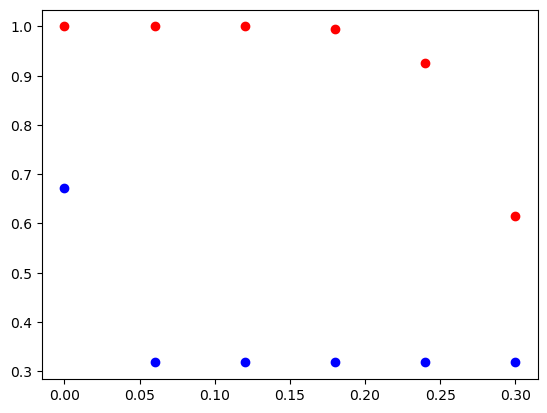

In [18]:
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3350,c='blue')
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3350_prime,c='red')

In [19]:
#addition of tri tone cross contamination (no noise)

start_time = time.time()
n = 350 # number of words in each dictionary (n for each tone)
lam = 30 # average sentence length
crossC3test_fraction = .1 #the expected portion of the words in each sentnece that are from the opposite tone.
imported_vader_words = []
negative_vader_list = []
neutral_vader_list = []
positive_vader_list = []
acc_vec_crossC3test = []
acc_vec_crossC3test_prime =[]

#reading in the words. Change the filepath to suit where yours is stored
x = open(r"C:\Users\ajpar\OneDrive\Desktop\Research Documents\Project Coding\Sample_Word_Datasets\Full_Vader_Senti.txt", "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
for line in x:
    
    l = line.strip('\n')
    l = l.split("\t")
    imported_vader_words.append(l)
    
x.close()

for y in imported_vader_words : #sorting the words by tone
    if (-1<= float(y[1]) <= 1):
        neutral_vader_list.append(y[0]) 
    elif (float(y[1]) < -1):
        negative_vader_list.append(y[0])
    else :
        positive_vader_list.append(y[0])




for crossC3test_fraction in np.linspace(0,.3,6):
    shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
    shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
    shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates
    
    
    negative_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam - 2*lam*crossC3test_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3test_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3test_fraction, size=None)
        negative_sent_list.append(random.sample(shorten_neg, h) +random.sample(shorten_pos, k) + random.sample(shorten_neutral,j))

    positive_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3test_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3test_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3test_fraction, size=None)
        positive_sent_list.append(random.sample(shorten_pos, h)+random.sample(shorten_neg, k) + random.sample(shorten_neutral,j))

    neutral_sent_list = []
    for i in range(0,500):
        #changes so poisson is still same mean with addition
        h = np.random.poisson(lam=lam - 2*lam*crossC3test_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC3test_fraction, size=None)
        j = np.random.poisson(lam= lam*crossC3test_fraction, size=None)
        neutral_sent_list.append(random.sample(shorten_neutral,h)+random.sample(shorten_pos, k)+random.sample(shorten_neg, j))
    
    
    
    
    final_list = negative_sent_list + positive_sent_list + neutral_sent_list

    #getting wordlist 
    wordlist_crossC3test = {x for l in final_list for x in l}
    #wordlist_crossC3test_prime = {x for l in final_list for x in l}

    #generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
    resolving_crossC3test = Random_Resolving_Set((shorten_pos+shorten_neg+shorten_neutral).copy())
    #resolving_crossC3test_prime = Random_Resolving_Set(shorten_pos) + Random_Resolving_Set(shorten_neg) + Random_Resolving_Set(shorten_neutral)# + #Random_Resolving_Set(shorten_neutral)
    print(len(resolving_crossC3test))

    #generating the Jaccard Matrices
    JacMatrix_crossC3test = JVecEMatrix(resolving_crossC3test,final_list)
    #JacMatrix_crossC3test_prime = JVecEMatrix(resolving_crossC3test_prime,final_list)

    labeled_dic_crossC3test = {}
    #labeled_dic_crossC3test_prime = {}

    #this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
    for i in range(0,len(JacMatrix_crossC3test)):
        if (i<500):
            labeled_dic_crossC3test[i] = {'vec': JacMatrix_crossC3test[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC3test[i] = {'vec': JacMatrix_crossC3test[i], 'tone': "positive"}
        else:
            labeled_dic_crossC3test[i] = {'vec': JacMatrix_crossC3test[i], 'tone': "neutral"} #for now this never triggers, but could for tri tone cross contam


    #for i in range(0,len(JacMatrix_crossC3test_prime)):
    #    if (i<500):
    #        labeled_dic_crossC3test_prime[i] = {'vec': JacMatrix_crossC3test_prime[i], 'tone': "negative"}
     #   elif (500<i<1000):
     #       labeled_dic_crossC3test_prime[i] = {'vec': JacMatrix_crossC3test_prime[i], 'tone': "positive"}
      #  else:
       #     labeled_dic_crossC3test_prime[i] = {'vec': JacMatrix_crossC3test_prime[i], 'tone': "neutral"}#for now this never triggers, but could for tri tone cross contam
    
    
    
    df2crossC3test = pd.DataFrame.from_dict(labeled_dic_crossC3test,orient='index')
    tones_crossC3test = pd.DataFrame(df2crossC3test.tone)
    # only pulling out tone because thats our label
    jaccard_df_crossC3test = pd.DataFrame(df2crossC3test.vec.tolist())
    t_crossC3test = pd.Categorical(tones_crossC3test['tone'])
    tones_crossC3test['tone'] = t_crossC3test.codes
    
   # df2crossC3test_prime = pd.DataFrame.from_dict(labeled_dic_crossC3test_prime,orient='index')
    #tones_crossC3test_prime = pd.DataFrame(df2crossC3test_prime.tone)
    # only pulling out tone because thats our label
    #jaccard_df_crossC3test_prime = pd.DataFrame(df2crossC3test_prime.vec.tolist())
    #t_crossC3test_prime = pd.Categorical(tones_crossC3test_prime['tone'])
    #tones_crossC3test_prime['tone'] = t_crossC3test_prime.codes
    
    X_jacc_words_crossC3test = jaccard_df_crossC3test.to_numpy()
    Y_label_crossC3test = tones_crossC3test.to_numpy()
    X_train_crossC3test, X_test_crossC3test, y_train_crossC3test, y_test_crossC3test = train_test_split(X_jacc_words_crossC3test, Y_label_crossC3test, test_size=0.3, random_state=430)
    model_clf_crossC3test = svm.SVC(kernel='linear').fit(X_train_crossC3test, np.ravel(y_train_crossC3test))
    predicted_crossC3test = model_clf_crossC3test.predict(X_test_crossC3test)
    #print(accuracy_score(y_test, predicted))
    acc_vec_crossC3test.append(accuracy_score(y_test_crossC3test, predicted_crossC3test))
    
    #X_jacc_words_crossC3test_prime = jaccard_df_crossC3test_prime.to_numpy()
    #Y_label_crossC3test_prime = tones_crossC3test_prime.to_numpy()
    #X_train_crossC3test_prime, X_test_crossC3test_prime, y_train_crossC3test_prime, y_test_crossC3test_prime = train_test_split(X_jacc_words_crossC3test_prime, Y_label_crossC3test_prime, test_size=0.3, random_state=430)
    #model_clf_crossC3test_prime = svm.SVC(kernel='linear').fit(X_train_crossC3test_prime, np.ravel(y_train_crossC3test_prime))
    #predicted_crossC3test_prime = model_clf_crossC3test_prime.predict(X_test_crossC3test_prime)
    ##print(accuracy_score(y_test, predicted))
    #acc_vec_crossC3test_prime.append(accuracy_score(y_test_crossC3test_prime, predicted_crossC3test_prime))
    print("--- %s seconds ---" % (time.time() - start_time))
print("--- %s seconds ---" % (time.time() - start_time))

332
--- 18.082948684692383 seconds ---
332
--- 37.81476068496704 seconds ---
332
--- 57.43741774559021 seconds ---
332
--- 77.42983984947205 seconds ---
332
--- 97.12149262428284 seconds ---
332
--- 116.50393676757812 seconds ---
--- 116.50393676757812 seconds ---


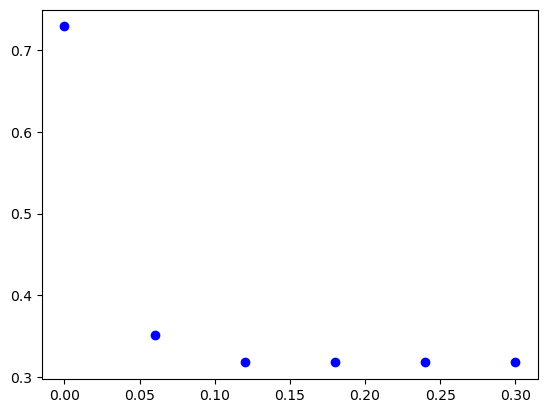

In [20]:
plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3test,c='blue')
#plt.scatter(np.linspace(0,.3,6), acc_vec_crossC3350_prime,c='red')

In [21]:
#no mix

n = 1400 # number of words in each dictionary (n for each tone)
# average sentence length
imported_vader_words = []
negative_vader_list = []
neutral_vader_list = []
positive_vader_list = []
acc_vec_lam = []
acc_vec_lam_prime = []

#reading in the words. Change the filepath to suit where yours is stored
x = open(r"C:\Users\ajpar\OneDrive\Desktop\Research Documents\Project Coding\Sample_Word_Datasets\Full_Vader_Senti.txt", "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
for line in x:
    
    l = line.strip('\n')
    l = l.split("\t")
    imported_vader_words.append(l)
    
x.close()

for y in imported_vader_words : #sorting the words by tone
    if (-1<= float(y[1]) <= 1):
        neutral_vader_list.append(y[0]) 
    elif (float(y[1]) < -1):
        negative_vader_list.append(y[0])
    else :
        positive_vader_list.append(y[0])


shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates

for lam in np.linspace(20,100,9):
    negative_sent_list = []#generating the negative sentences. repeats for positive and neutral
    for i in range(0,500):
        h = np.random.poisson(lam=lam, size=None) #chooses the length via a poisson
        negative_sent_list.append(random.sample(shorten_neg.copy(), h)) #takes a random sample 

    positive_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam, size=None)
        positive_sent_list.append(random.sample(shorten_pos.copy(), h))
    #print(negative_sent_list)

    #print(positive_sent_list)

    neutral_sent_list = []

    for i in range(0,500):
        h = np.random.poisson(lam=lam, size=None)
        neutral_sent_list.append(random.sample(shorten_neutral.copy(), h))

    final_list = negative_sent_list + positive_sent_list + neutral_sent_list

    #getting wordlist 
    wordlist_pure = {x for l in final_list for x in l}
    wordlist_pure_prime = {x for l in final_list for x in l}

    #generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
    resolving_pure = Random_Resolving_Set((shorten_pos+shorten_neg+shorten_neutral).copy())
    resolving_pure_prime = Random_Resolving_Set(shorten_pos.copy()) + Random_Resolving_Set(shorten_neg.copy()) + Random_Resolving_Set(shorten_neutral.copy())
    print(len(resolving_pure))

    #generating the Jaccard Matrices
    JacMatrix_Pure = JVecEMatrix(resolving_pure,final_list)
    JacMatrix_Pure_prime = JVecEMatrix(resolving_pure_prime,final_list)

    labeled_dic_pure = {}
    labeled_dic_pure_prime = {}

    #this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
    for i in range(0,len(JacMatrix_Pure)):
        if (i<500):
            labeled_dic_pure[i] = {'vec': JacMatrix_Pure[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_pure[i] = {'vec': JacMatrix_Pure[i], 'tone': "positive"}
        else:
            labeled_dic_pure[i] = {'vec': JacMatrix_Pure[i], 'tone': "neutral"}


    for i in range(0,len(JacMatrix_Pure_prime)):
        if (i<500):
            labeled_dic_pure_prime[i] = {'vec': JacMatrix_Pure_prime[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_pure_prime[i] = {'vec': JacMatrix_Pure_prime[i], 'tone': "positive"}
        else:
            labeled_dic_pure_prime[i] = {'vec': JacMatrix_Pure_prime[i], 'tone': "neutral"}
    
    
    df2pure = pd.DataFrame.from_dict(labeled_dic_pure,orient='index')
    tones = pd.DataFrame(df2pure.tone)
    # only pulling out tone because thats our label
    jaccard_df_lam = pd.DataFrame(df2pure.vec.tolist())
    t = pd.Categorical(tones['tone'])
    tones['tone'] = t.codes
    
    df2pure_prime = pd.DataFrame.from_dict(labeled_dic_pure_prime,orient='index')
    tones_prime = pd.DataFrame(df2pure_prime.tone)
    # only pulling out tone because thats our label
    jaccard_df_lam_prime = pd.DataFrame(df2pure_prime.vec.tolist())
    t_p = pd.Categorical(tones_prime['tone'])
    tones_prime['tone'] = t_p.codes
    
    X_jacc_words_lam = jaccard_df_lam.to_numpy()
    Y_label = tones.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_jacc_words_lam, Y_label, test_size=0.3, random_state=42)
    model_clf = svm.SVC(kernel='linear').fit(X_train, np.ravel(y_train))
    predicted = model_clf.predict(X_test)
    #print(accuracy_score(y_test, predicted))
    acc_vec_lam.append(accuracy_score(y_test, predicted))
    
    X_jacc_words_lam_prime = jaccard_df_lam_prime.to_numpy()
    Y_label_prime = tones_prime.to_numpy()
    X_train_prime, X_test_prime, y_train_prime, y_test_prime = train_test_split(X_jacc_words_lam_prime, Y_label_prime, test_size=0.3, random_state=42)
    model_clf_prime = svm.SVC(kernel='linear').fit(X_train_prime, np.ravel(y_train_prime))
    predicted_prime = model_clf_prime.predict(X_test_prime)
    #print(accuracy_score(y_test, predicted))
    acc_vec_lam_prime.append(accuracy_score(y_test_prime, predicted_prime))
    

1107
1107
1107
1107
1107
1107
1107
1107
1107


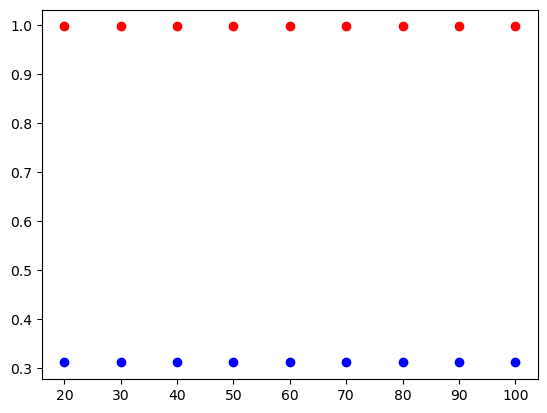

In [24]:
plt.scatter(np.linspace(20,100,9), acc_vec_lam,c='blue')
plt.scatter(np.linspace(20,100,9), acc_vec_lam_prime,c='red')